In [ ]:
%%capture
%pip install neqsim

#To check for methods in a Java object 
#from neqsim import methods

# Experimental data
Experimental data for viscosity of hydrogen is collected.

In [1]:
import pandas as pd
expdata_df = pd.read_csv('../../../data/physicalproperties/viscosity/hydrogen.csv')
expdata_df

,Fluid,Property,Dataset,#T (K),P(Mpa),H2(mol fraction),rho(kg/m3),Z,Visc(Pa s),Thermal Conductivity (W/K/m),Run,JT,T ( C),T ( R)
0,H2,Viscosity,Yusibani2011,294.52,4.690000,NaN,NaN,NaN,0.000009,NaN,NaN,NaN,21.52,530.136
1,H2,Viscosity,Yusibani2011,294.91,10.160000,NaN,NaN,NaN,0.000009,NaN,NaN,NaN,21.91,530.838
2,H2,Viscosity,Yusibani2011,294.99,34.430000,NaN,NaN,NaN,0.000010,NaN,NaN,NaN,21.99,530.982
3,H2,Viscosity,Yusibani2011,295.01,52.740000,NaN,NaN,NaN,0.000010,NaN,NaN,NaN,22.01,531.018
4,H2,Viscosity,Yusibani2011,295.00,81.650000,NaN,NaN,NaN,0.000011,NaN,NaN,NaN,22.00,531.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,H2,Viscosity,Michels1953,323.15,23.882303,NaN,NaN,NaN,0.000010,NaN,NaN,NaN,50.15,581.670
77,H2,Viscosity,Michels1953,323.15,29.698358,NaN,NaN,NaN,0.000010,NaN,NaN,NaN,50.15,581.670
78,H2,Viscosity,Michels1953,323.15,34.855800,NaN,NaN,NaN,0.000010,NaN,NaN,NaN,50.15,581.670
79,H2,Viscosity,Michels1953,323.15,45.849562,NaN,NaN,NaN,0.000010,NaN,NaN,NaN,50.15,581.670


<Figure size 640x480 with 0 Axes>

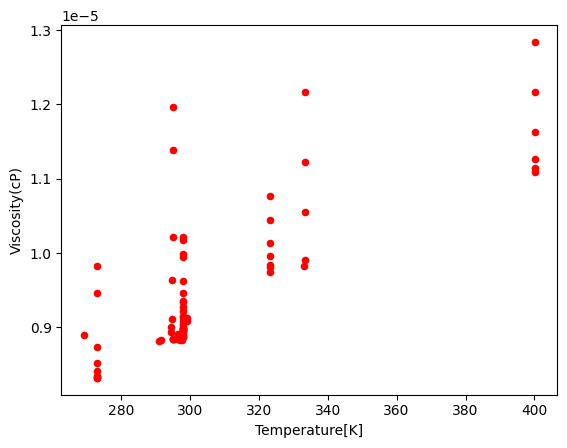

In [3]:
from matplotlib import pyplot as plt
fig = plt.figure()

expdata_df.plot(x='#T (K)', y='Visc(Pa s)', kind='scatter',ylabel='Viscosity(cP)', xlabel='Temperature[K]',color='red')

plt.show()

# Evaluation of experimental data

In this section the experimental data will be evaluated and eventual some data sets will be removed from the set.

# Compare to NeqSim Calculations

## NeqSim calculations

<Figure size 640x480 with 0 Axes>

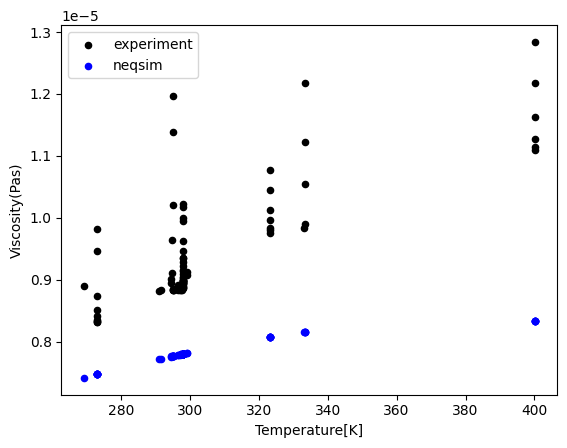

In [12]:
import neqsim
from neqsim.thermo.thermoTools import fluid, TPflash, fluidComposition,bubp
import pandas as pd
import numpy as np

fluid1 = fluid('pr')
fluid1.addComponent('hydrogen', 1.0)
fluid1.setTemperature(15.0, 'C')
fluid1.setPressure(100.0, 'bara')

def viscosity(temp):
    fluid1.setTemperature(temp, 'K')
    fluid1.setPressure(1.0, 'bara') #need ti be updated with correct pressure
    try:
        TPflash(fluid1)
        fluid1.initProperties()
        return fluid1.getPhase('gas').getViscosity('cP')/1000.0
    except:
        return float("nan")
temperatures = expdata_df['#T (K)'].values.tolist()
visc_res = [viscosity(T) for T in temperatures]

dataWithExperiment = expdata_df.assign(calc_viscosity = visc_res)

from matplotlib import pyplot as plt
fig = plt.figure()	
plot1 = dataWithExperiment.plot(x='#T (K)', y='Visc(Pa s)', kind='scatter',ylabel='Viscosity(Pas)', xlabel='Temperature[K]',color='black')	
dataWithExperiment.plot(ax=plot1, x='#T (K)', y='calc_viscosity', kind='scatter',ylabel='Viscosity(Pas)', xlabel='Temperature[K]',color='blue')	
plt.legend(['experiment', 'neqsim'])
plt.show()

# Parameter fitting

## Manual fitting

## Automatic fitting